In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("aggregated_bmrd_ids.txt", "r") as infile:
        filtered_IDs = infile.read().replace("\n","").split(",")
        filtered_IDs = set([int(bmrb_id) for bmrb_id in filtered_IDs])


In [3]:
len(filtered_IDs)

3184

In [4]:
with open("chemical_shifts.pkl", "rb") as infile:
        chemical_shifts = pickle.load(infile)
        bmrb_ids = set(list(chemical_shifts))

In [5]:
filtered_chemical_shifts = list(filtered_IDs.intersection(bmrb_ids))

In [6]:
len(filtered_chemical_shifts)

3184

# H-Shifts

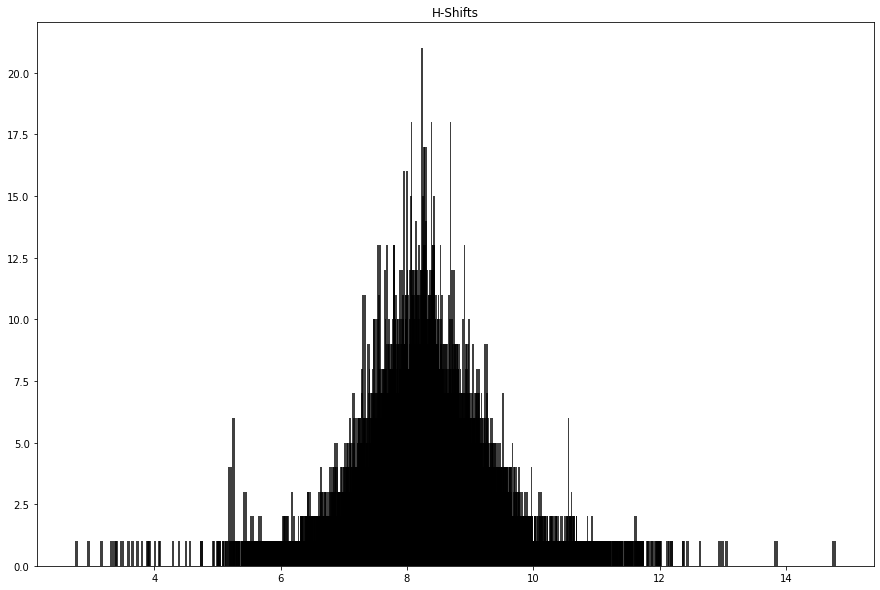

In [7]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].X_shift, 150, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("H-Shifts")
plt.show()

In [8]:
H_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].X_shift) > 11 or min(chemical_shifts[bmrb_id].X_shift) < 6:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].X_shift), "min --> ", min(chemical_shifts[bmrb_id].X_shift))
        H_to_large_or_small.append(bmrb_id)

16384 : max -->  10.95 min -->  5.09
16426 : max -->  11.122 min -->  6.935
16441 : max -->  11.189 min -->  6.978
16490 : max -->  9.219 min -->  5.443
16507 : max -->  11.192 min -->  6.909
16545 : max -->  9.514 min -->  5.613
16578 : max -->  10.336 min -->  5.295
16632 : max -->  11.119 min -->  6.623
16675 : max -->  11.293 min -->  5.633
16692 : max -->  9.15 min -->  5.937
16795 : max -->  11.2 min -->  6.57
16807 : max -->  10.273 min -->  5.269
25026 : max -->  11.187 min -->  6.9
16842 : max -->  10.359 min -->  3.888
25081 : max -->  10.901 min -->  5.553
16905 : max -->  11.109 min -->  6.481
16912 : max -->  9.725 min -->  4.077
16929 : max -->  11.755 min -->  3.463
16934 : max -->  9.736 min -->  5.764
16956 : max -->  11.52 min -->  6.64
16969 : max -->  11.989 min -->  7.387
17074 : max -->  11.618 min -->  6.226
17076 : max -->  11.34 min -->  6.192
17080 : max -->  9.936 min -->  5.331
17125 : max -->  10.133 min -->  5.958
25324 : max -->  10.123 min -->  2.937
253

In [9]:
keys = filtered_chemical_shifts.copy()

In [10]:
len(keys)

3184

In [11]:
for bmrb_id in H_to_large_or_small:
    keys.remove(bmrb_id)

In [12]:
len(H_to_large_or_small)

341

# N-Shifts

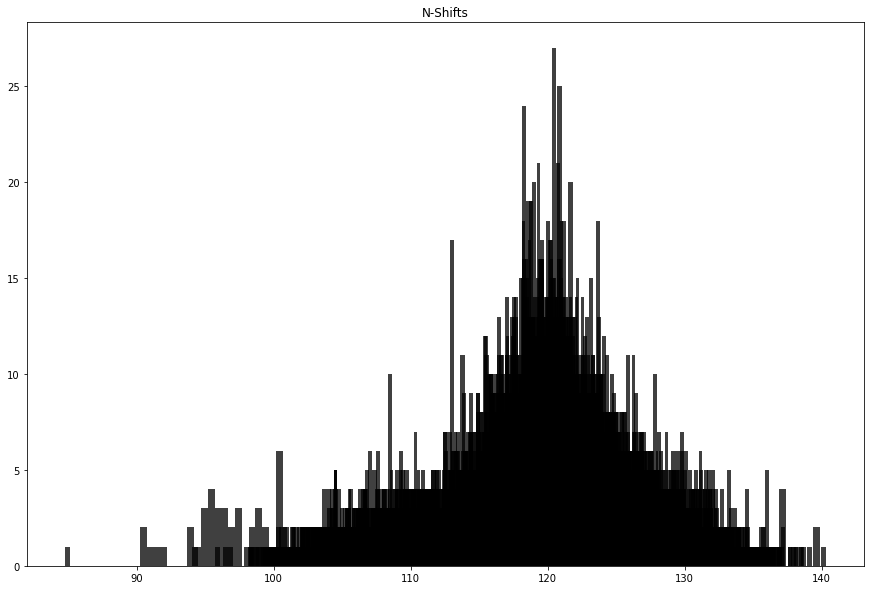

In [13]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].Y_shift, 100, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("N-Shifts")
plt.show()

In [14]:
N_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].Y_shift) > 140 or min(chemical_shifts[bmrb_id].Y_shift) < 90:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].Y_shift), "min --> ", min(chemical_shifts[bmrb_id].Y_shift))
        N_to_large_or_small.append(bmrb_id)

5060 : max -->  140.3 min -->  105.1
30921 : max -->  123.749 min -->  84.773


In [15]:
for bmrb_id in N_to_large_or_small:
    if bmrb_id not in H_to_large_or_small:
        print(bmrb_id)
        keys.remove(bmrb_id)

5060
30921


In [16]:
len(keys)

2841

In [17]:
len(N_to_large_or_small)

2

In [18]:
with open("all_with_filtered_by_shifts_constraints.txt", "w") as outfile:
    outfile.writelines(",".join(map(str, keys)))